In [ ]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 8.08 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 21.6 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-10 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
Saved 1 image to runs/detect/exp


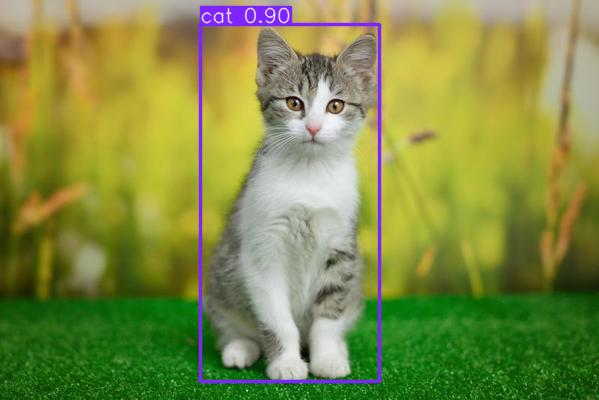

         xmin       ymin        xmax        ymax  confidence  class name
0  200.407684  24.729609  379.196136  381.424652    0.903619     15  cat
Model saved as yolov5_model.pkl
Model successfully loaded from Pickle file!


In [ ]:
import torch
import pickle
from pathlib import Path
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

# Load the pretrained YOLOv5 model
# Options for model_name: 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x'
model_name = 'yolov5m'
model = torch.hub.load('ultralytics/yolov5', model_name, pretrained=True)

image_path = "cat.jpg"  # Replace with your image path
image = Image.open(image_path)

#  Perform inference
results = model(image)

# Save results and visualize
# Save the detected image
results.save()  # This saves the image with detections to the `runs/detect/exp` folder by default

# Get the directory where results are saved
output_dir = Path('runs/detect/exp')  # YOLOv5 saves results here by default
detected_image_path = output_dir / image_path.split('/')[-1]  # Construct the path for the saved image

# Display the detected image
detected_image = cv2.imread(str(detected_image_path))
cv2_imshow(detected_image)  # Display the image in Colab

# Step 5: Save results to a pickle file
detections = results.pandas().xyxy[0]  # Extract detection results

print(detections)  # Display detections

# Save the model as a Pickle file
output_file = 'yolov5_model.pkl'
with open(output_file, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved as {output_file}")

# Step 3: Load the model back (for verification)
with open(output_file, 'rb') as f:
    loaded_model = pickle.load(f)

print("Model successfully loaded from Pickle file!")
